In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from os import sys
sys.path.append("../../../machine_learning_tools/")

In [3]:
import pandas_ml as pdml
import pandas as pd

In [4]:
df = pd.read_csv("./authorship.csv")
df = df[[k for k in df.columns if k not in ["BookID"]]]
X,y = pdml.X_y(df,target_name = "Author")

In [13]:
y

0           Austen
1           Austen
2           Austen
3           Austen
4           Austen
          ...     
836    Shakespeare
837    Shakespeare
838    Shakespeare
839    Shakespeare
840    Shakespeare
Name: Author, Length: 841, dtype: object

In [23]:
labels_str = y.to_numpy()
(labels_str_unique,
 idx_to_name_map,
 labels_idx) = np.unique(labels_str,
                         return_index=True,
                         return_inverse=True)
str_order = labels_str[idx_to_name_map]
str_to_idx_map = text_to_plot_authors = {s:l_i for l_i,s in 
                        enumerate(str_order)}

# labels_colors = np.array(
#     mlu.generate_non_randon_named_color_list(
#         len(labels_str_unique))
# )
print(f"labels_str_unique = {labels_str_unique}")
# print(f"labels_colors= {labels_colors}")

str_to_idx_map

labels_str_unique = ['Austen' 'London' 'Milton' 'Shakespeare']


{'Austen': 0, 'London': 1, 'Milton': 2, 'Shakespeare': 3}

# Dimensionality Reduction Low

In [29]:
import dimensionality_reduction_utils as dru
from sklearn.decomposition import NMF

<Figure size 432x288 with 0 Axes>

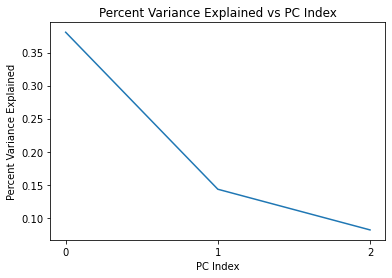

In [30]:
n_components = 3

pca_data = dru.pca_analysis(X,
                            n_components=n_components,
                 plot_sqrt_eigvals=False,
                 plot_perc_variance_explained=True)
X_pca_low = pca_data["data_proj"]

model = NMF(n_components=n_components, init='random', random_state=0)
X_nmf_low = model.fit_transform(X)

<Figure size 432x288 with 0 Axes>

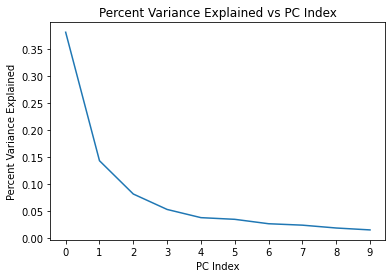

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [32]:
n_components = 10

pca_data = dru.pca_analysis(X,
                            n_components=n_components,
                 plot_sqrt_eigvals=False,
                 plot_perc_variance_explained=True)
X_pca_med = pca_data["data_proj"]

model = NMF(n_components=n_components, init='random', random_state=0)
X_nmf_med = model.fit_transform(X)

# Implementing the different clustering methods

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [15]:
n_clusters = 4

# -- K-means --

In [16]:
kmeans = KMeans(n_clusters=n_clusters,
                random_state=0)

In [24]:
def cluster_accuracy(model,y=labels_idx):
    return np.sum(model.labels_ != y)/len(y)

In [28]:
import sklearn_utils as sklu
kmeans.fit(X)
cluster_accuracy(kmeans)

kmeans.fit(X_nmf_low)
cluster_accuracy(kmeans)

0.41379310344827586

# -- hierarchical clustering --

In [34]:
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration

In [35]:
hc_ward = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward")

hc_average = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="average")

hc_single = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="single")

hc_complete = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="complete")

# -- spectral clustering --